<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/1_parameter_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

t_c are temperatures in Celsius, and t_u are the unknown units

In [0]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Write out the model as a Python function in which you’re expecting t_u, w, and b to be the input tensor, weight parameter, and
bias parameter, respectively.

In [0]:
def model(t_u, w, b):
 return w * t_u + b

Defining the loss

In [0]:
def loss_fn(t_p, t_c):
 squared_diffs = (t_p - t_c)**2
 return squared_diffs.mean()

Initializing the parameters and invoke the model

In [5]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

Checking the value of the loss

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

Applying a small change to w and b to see how much the
loss is changing in that neighborhood

In [0]:
delta = 0.1
loss_rate_of_change_w = \
 (loss_fn(model(t_u, w + delta, b), t_c) -
 loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

Applying a change to w that’s proportional to the rate of
change of the loss and scale the rate of change by a typically small factor

In [0]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

Trying the same with b 

In [0]:
loss_rate_of_change_b = \
 (loss_fn(model(t_u, w, b + delta), t_c) -
 loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

 Recalling the expression for the loss

In [0]:
def loss_fn(t_p, t_c):
 squared_diffs = (t_p - t_c)**2
 return squared_diffs.mean()

In [0]:
def dloss_fn(t_p, t_c):
 dsq_diffs = 2 * (t_p - t_c)
 return dsq_diffs

In [0]:
# def model(t_u, w, b):
#  return w * t_u + b

Getting the derivatives

In [0]:
def dmodel_dw(t_u, w, b):
 return t_u

In [0]:
def dmodel_db(t_u, w, b):
 return 1.0

Putting all this together, the function that returns the gradient of the loss with respect
to w and b is

In [0]:
def grad_fn(t_u, t_c, t_p, w, b):
 dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
 dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
 return torch.stack([dloss_dw.mean(), dloss_db.mean()])

 Complete training loop using epochs

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
 for epoch in range(1, n_epochs + 1):
   w, b = params
   t_p = model(t_u, w, b)
   loss = loss_fn(t_p, t_c)
   grad = grad_fn(t_u, t_c, t_p, w, b)
   params = params - learning_rate * grad
   print('Epoch %d, Loss %f' % (epoch, float(loss)))
 return params

Invoking the training loop

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [18]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_u,
 t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9707])
Epoch 3, Loss 19408031744.000000
    Params: tensor([-148527.7344,   -2616.3933])
    Grad:   tensor([15109615.0000,   266155.7188])
...
Epoch 10, Loss 90901075478458130961171361977860096.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [19]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-4,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_u,
 t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5780, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [0]:
t_un = 0.1 * t_u

Running the training loop on the normalized input

In [21]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_un,
 t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574917
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030487
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941875
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4445,  2.5165])


tensor([ 2.7553, -2.5162])

Running the loop for enough iterations to see the changes in params get small.
Changing n_epochs to 5000

In [22]:
params = training_loop(
 n_epochs = 5000,
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_un,
 t_c = t_c,
 print_params = False)
params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

Plotting the linear-fit model (solid line) versus input data (circles)

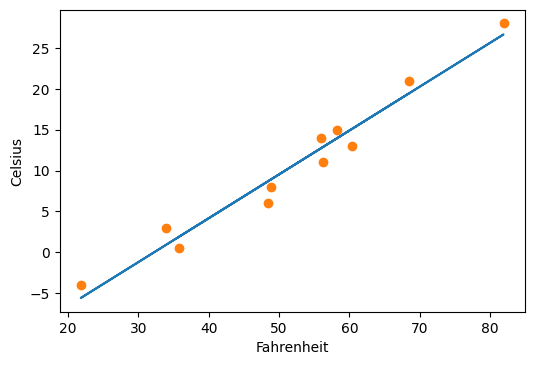

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')